In [1]:
# ollama create aidoctor -f ./modelfile.py

In [2]:
# !pip install ipywidgets
# !pip install ollama
# !pip install gradio
# !pip install langchain

In [3]:
import ollama
import gradio as gr
import re
from langchain.text_splitter import RecursiveCharacterTextSplitter
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt
import time
import numpy as np

In [4]:
def process_text(input_data):
    if input_data is None:
        return None, None

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
    chunks = text_splitter.split_text(input_data)
    return text_splitter, chunks

In [5]:
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model="aidoctor", messages=[{'role': 'user', 'content': formatted_prompt}])
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return final_answer

In [6]:
def ollama_llm_medllama2(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model="medllama2", messages=[{'role': 'user', 'content': formatted_prompt}])
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return final_answer

In [7]:
def ollama_llm_wizardlm2(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model="wizardlm2", messages=[{'role': 'user', 'content': formatted_prompt}])
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return final_answer

In [8]:
def ollama_llm_mistral(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model="mistral", messages=[{'role': 'user', 'content': formatted_prompt}])
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return final_answer

In [9]:
def ollama_llm_meditron(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model="mistral", messages=[{'role': 'user', 'content': formatted_prompt}])
    response_content = response['message']['content']
    final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
    return final_answer

In [10]:
def rag_chain(question, chunks):
    formatted_content = "\n\n".join(chunks)
    return ollama_llm(question, formatted_content)

In [11]:
def rag_chain_medllama2(question, chunks):
    formatted_content = "\n\n".join(chunks)
    return ollama_llm_medllama2(question, formatted_content)

In [12]:
def rag_chain_wizardlm2(question, chunks):
    formatted_content = "\n\n".join(chunks)
    return ollama_llm_wizardlm2(question, formatted_content)

In [13]:
def rag_chain_mistral(question, chunks):
    formatted_content = "\n\n".join(chunks)
    return ollama_llm_mistral(question, formatted_content)

In [14]:
def rag_chain_meditron(question, chunks):
    formatted_content = "\n\n".join(chunks)
    return ollama_llm_mistral(question, formatted_content)

In [15]:
def detailed_diagnosis(input_text):
    text_splitter, chunks = process_text(input_text)
    if text_splitter is None:
        return "No text input provided."

    diagnosis = rag_chain("Please provide a detailed diagnosis for the symptoms described.", chunks)
    cures = rag_chain("What are the possible cures for the diagnosed condition?", chunks)
    treatments = rag_chain("What are the possible treatments for the diagnosed condition?", chunks)
    
    structured_response = (
        f"Diagnosis:\n\n{diagnosis}\n\n"
        f"Cures:\n\n{cures}\n\n"
        f"Treatments:\n\n{treatments}\n\n"
    )

    return structured_response

In [16]:
# def detailed_diagnosis(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain("", chunks)
#     # cures = rag_chain("What are the possible cures for the diagnosed condition?", chunks)
#     # treatments = rag_chain("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"{diagnosis}"
#         # f"Cures:\n\n{cures}\n\n"
#         # f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

In [17]:
def detailed_diagnosis_medllama2(input_text):
    text_splitter, chunks = process_text(input_text)
    if text_splitter is None:
        return "No text input provided."

    diagnosis = rag_chain_medllama2("Please provide a detailed diagnosis for the symptoms described.", chunks)
    cures = rag_chain_medllama2("What are the possible cures for the diagnosed condition?", chunks)
    treatments = rag_chain_medllama2("What are the possible treatments for the diagnosed condition?", chunks)
    
    structured_response = (
        f"Diagnosis:\n\n{diagnosis}\n\n"
        f"Cures:\n\n{cures}\n\n"
        f"Treatments:\n\n{treatments}\n\n"
    )

    return structured_response

In [18]:
def detailed_diagnosis_wizardlm2(input_text):
    text_splitter, chunks = process_text(input_text)
    if text_splitter is None:
        return "No text input provided."

    diagnosis = rag_chain_wizardlm2("Please provide a detailed diagnosis for the symptoms described.", chunks)
    cures = rag_chain_wizardlm2("What are the possible cures for the diagnosed condition?", chunks)
    treatments = rag_chain_wizardlm2("What are the possible treatments for the diagnosed condition?", chunks)
    
    structured_response = (
        f"Diagnosis:\n\n{diagnosis}\n\n"
        f"Cures:\n\n{cures}\n\n"
        f"Treatments:\n\n{treatments}\n\n"
    )

    return structured_response

In [19]:
def detailed_diagnosis_mistral(input_text):
    text_splitter, chunks = process_text(input_text)
    if text_splitter is None:
        return "No text input provided."

    diagnosis = rag_chain_mistral("Please provide a detailed diagnosis for the symptoms described.", chunks)
    cures = rag_chain_mistral("What are the possible cures for the diagnosed condition?", chunks)
    treatments = rag_chain_mistral("What are the possible treatments for the diagnosed condition?", chunks)
    
    structured_response = (
        f"Diagnosis:\n\n{diagnosis}\n\n"
        f"Cures:\n\n{cures}\n\n"
        f"Treatments:\n\n{treatments}\n\n"
    )

    return structured_response

In [20]:
def detailed_diagnosis_meditron(input_text):
    text_splitter, chunks = process_text(input_text)
    if text_splitter is None:
        return "No text input provided."

    diagnosis = rag_chain_meditron("Please provide a detailed diagnosis for the symptoms described.", chunks)
    cures = rag_chain_meditron("What are the possible cures for the diagnosed condition?", chunks)
    treatments = rag_chain_meditron("What are the possible treatments for the diagnosed condition?", chunks)
    
    structured_response = (
        f"Diagnosis:\n\n{diagnosis}\n\n"
        f"Cures:\n\n{cures}\n\n"
        f"Treatments:\n\n{treatments}\n\n"
    )

    return structured_response

In [21]:
interface = gr.Interface(
    fn=detailed_diagnosis,
    inputs=gr.Textbox(lines=10, label="Describe your symptoms"),
    outputs="text",
    title="AI Doctor - Detailed Diagnosis",
    description="Enter your symptoms to receive a detailed medical diagnosis and recommendations."
)

interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Comparisions between our llm model with existes llm models

In [22]:
def compare_models(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output):
    # Compare outputs from all four models
    if (
        aidoctor_output == medllama2_output == wizardlm2_output == meditron_output == mistral_output
    ):
        return "The outputs of all four models are identical."
    else:
        differences = []
        if aidoctor_output != medllama2_output:
            differences.append("AI Doctor vs. MedLLaMA2 outputs differ.")
        if aidoctor_output != wizardlm2_output:
            differences.append("AI Doctor vs. WizardLM2 outputs differ.")
        if aidoctor_output != meditron_output:
            differences.append("AI Doctor vs. Meditron outputs differ.")
        if aidoctor_output != mistral_output:
            differences.append("AI Doctor vs. Mistral outputs differ.")
        if medllama2_output != wizardlm2_output:
            differences.append("MedLLaMA2 vs. WizardLM2 outputs differ.")
        if medllama2_output != meditron_output:
            differences.append("MedLLaMA2 vs. Meditron outputs differ.")
        if medllama2_output != mistral_output:
            differences.append("MedLLaMA2 vs. Mistral outputs differ.")
        if wizardlm2_output != meditron_output:
            differences.append("WizardLM2 vs. Meditron outputs differ.")
        if wizardlm2_output != mistral_output:
            differences.append("WizardLM2 vs. Mistral outputs differ.")
        if meditron_output != mistral_output:
            differences.append("Meditron vs. Mistral outputs differ.")
        return "The outputs of the models differ:\n" + "\n".join(differences)


In [23]:
# Function to measure computation time for each model
def measure_computation_speed(func, input_text):
    start_time = time.time()
    output = func(input_text)  # Run the function
    end_time = time.time()
    return [end_time - start_time, output]

In [24]:
# Example usage with the outputs of two models
input_text = "I have been experiencing the following symptoms: Persistent headache, Nausea and vomiting, Sensitivity to light, Stiff neck, Fever. Please provide a detailed diagnosis, possible cures, and treatments."
input_text1 = "I have been experiencing the following symptoms: Throbbing headache, nausea, sensitivity to light and sound, visual disturbances (aura), fatigue. Please provide a detailed diagnosis, possible cures, and treatments."
input_text2 = "I have been experiencing the following symptoms: Excessive thirst, frequent urination, unexpected weight loss, blurred vision, fatigue. Please provide a detailed diagnosis, possible cures, and treatments."
input_text3 = "I have been experiencing the following symptoms: Chest pain when breathing or coughing, cough with phlegm, fever, chills, shortness of breath. Please provide a detailed diagnosis, possible cures, and treatments."
input_text4 = "I have been experiencing the following symptoms: Rapid heartbeat, weight loss despite increased appetite, sweating, nervousness, and hand tremors. Please provide a detailed diagnosis, possible cures, and treatments."
input_text5 = "I have been experiencing the following symptoms: High fever, severe headache, joint and muscle pain, skin rash, and bleeding (e.g., gums or nose). Please provide a detailed diagnosis, possible cures, and treatments."


In [25]:
aidoctor_output_list = measure_computation_speed(detailed_diagnosis,input_text)
medllama2_output_list = measure_computation_speed(detailed_diagnosis_medllama2,input_text)
wizardlm2_output_list = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text)
meditron_output_list = measure_computation_speed(detailed_diagnosis_meditron,input_text)
mistral_output_list = measure_computation_speed(detailed_diagnosis_mistral,input_text)

In [26]:
aidoctor_output_list1 = measure_computation_speed(detailed_diagnosis,input_text1)
medllama2_output_list1 = measure_computation_speed(detailed_diagnosis_medllama2,input_text1)
wizardlm2_output_list1 = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text1)
meditron_output_list1 = measure_computation_speed(detailed_diagnosis_meditron,input_text1)
mistral_output_list1 = measure_computation_speed(detailed_diagnosis_mistral,input_text1)

In [27]:
aidoctor_output_list2 = measure_computation_speed(detailed_diagnosis,input_text2)
medllama2_output_list2 = measure_computation_speed(detailed_diagnosis_medllama2,input_text2)
wizardlm2_output_list2 = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text2)
meditron_output_list2 = measure_computation_speed(detailed_diagnosis_meditron,input_text2)
mistral_output_list2 = measure_computation_speed(detailed_diagnosis_mistral,input_text2)

In [28]:
aidoctor_output_list3 = measure_computation_speed(detailed_diagnosis,input_text3)
medllama2_output_list3 = measure_computation_speed(detailed_diagnosis_medllama2,input_text3)
wizardlm2_output_list3 = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text3)
meditron_output_list3 = measure_computation_speed(detailed_diagnosis_meditron,input_text3)
mistral_output_list3 = measure_computation_speed(detailed_diagnosis_mistral,input_text3)

In [29]:
aidoctor_output_list4 = measure_computation_speed(detailed_diagnosis,input_text4)
medllama2_output_list4 = measure_computation_speed(detailed_diagnosis_medllama2,input_text4)
wizardlm2_output_list4 = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text4)
meditron_output_list4 = measure_computation_speed(detailed_diagnosis_meditron,input_text4)
mistral_output_list4 = measure_computation_speed(detailed_diagnosis_mistral,input_text4)

In [30]:
aidoctor_output_list5 = measure_computation_speed(detailed_diagnosis,input_text5)
medllama2_output_list5 = measure_computation_speed(detailed_diagnosis_medllama2,input_text5)
wizardlm2_output_list5 = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text5)
meditron_output_list5 = measure_computation_speed(detailed_diagnosis_meditron,input_text5)
mistral_output_list5 = measure_computation_speed(detailed_diagnosis_mistral,input_text5)

In [31]:
aidoctor_output = aidoctor_output_list[1]
medllama2_output = medllama2_output_list[1]
wizardlm2_output = wizardlm2_output_list[1] 
meditron_output = meditron_output_list[1]
mistral_output = mistral_output_list[1]

In [32]:
aidoctor_output1 = aidoctor_output_list1[1]
medllama2_output1 = medllama2_output_list1[1]
wizardlm2_output1 = wizardlm2_output_list1[1] 
meditron_output1 = meditron_output_list1[1]
mistral_output1 = mistral_output_list1[1]

In [33]:
aidoctor_output2 = aidoctor_output_list2[1]
medllama2_output2 = medllama2_output_list2[1]
wizardlm2_output2 = wizardlm2_output_list2[1] 
meditron_output2 = meditron_output_list2[1]
mistral_output2 = mistral_output_list2[1]

In [34]:
aidoctor_output3 = aidoctor_output_list3[1]
medllama2_output3 = medllama2_output_list3[1]
wizardlm2_output3 = wizardlm2_output_list3[1] 
meditron_output3 = meditron_output_list3[1]
mistral_output3 = mistral_output_list3[1]

In [35]:
aidoctor_output4 = aidoctor_output_list4[1]
medllama2_output4 = medllama2_output_list4[1]
wizardlm2_output4 = wizardlm2_output_list4[1] 
meditron_output4 = meditron_output_list4[1]
mistral_output4 = mistral_output_list4[1]

In [36]:
aidoctor_output5 = aidoctor_output_list5[1]
medllama2_output5 = medllama2_output_list5[1]
wizardlm2_output5 = wizardlm2_output_list5[1] 
meditron_output5 = meditron_output_list5[1]
mistral_output5 = mistral_output_list5[1]

In [37]:
comparison_result = compare_models(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output)
print("Model Result Comparision Report:\n",comparison_result)


Model Result Comparision Report:
 The outputs of the models differ:
AI Doctor vs. MedLLaMA2 outputs differ.
AI Doctor vs. WizardLM2 outputs differ.
AI Doctor vs. Meditron outputs differ.
AI Doctor vs. Mistral outputs differ.
MedLLaMA2 vs. WizardLM2 outputs differ.
MedLLaMA2 vs. Meditron outputs differ.
MedLLaMA2 vs. Mistral outputs differ.
WizardLM2 vs. Meditron outputs differ.
WizardLM2 vs. Mistral outputs differ.
Meditron vs. Mistral outputs differ.


In [38]:
# Ground Truth Data
ground_truth = """
Diagnosis:
Based on your symptoms of persistent headache, nausea and vomiting, sensitivity to light, stiff neck, and fever, I would suggest the possibility of Meningeal Inflammation or Meningitis.
Meningitis is an inflammation of the meninges, the membranes that cover the brain and spinal cord. It can be caused by viruses, bacteria, fungi, or other diseases. Symptoms may include severe headache, stiff neck, fever, nausea and vomiting, and sensitivity to light.
To confirm the diagnosis, a lumbar puncture (spinal tap) will be required to analyze the cerebrospinal fluid for signs of infection. A CT scan or MRI may also be ordered to visualize the brain and spinal cord.
If meningitis is confirmed, the treatment would typically involve antibiotics if it's a bacterial infection, antiviral medication in case of viral meningitis, and supportive care such as pain management, hydration, and close monitoring of vital signs. In severe cases, hospitalization may be necessary for intensive care and management of complications.
It is important to note that this diagnosis is based on the symptoms you have described, and a definitive diagnosis can only be made through medical tests and examinations by a healthcare professional. Always consult with a doctor if you are experiencing these or any other concerning symptoms.

Cures:
Based on the symptoms you've described - persistent headache, nausea and vomiting, sensitivity to light, stiff neck, and fever - it is possible that you are suffering from Meningitis.
Meningitis is an inflammation of the meninges, the protective layers covering the brain and spinal cord. It can be caused by infection with viruses, bacteria, or fungi.
1. Diagnosis: The diagnosis is typically confirmed through a series of tests including lumbar puncture (spinal tap), CT scan, or MRI. These tests help identify inflammation in the meninges and determine the cause.
2. Possible Cures: For bacterial meningitis, antibiotics are usually administered intravenously to kill the bacteria causing the infection. Antiviral drugs may also be used if a viral cause is suspected. In severe cases, hospitalization in an intensive care unit (ICU) may be necessary for close monitoring and supportive treatment.
3. Treatment: Treatment primarily involves eliminating the underlying cause and managing symptoms. In addition to antibiotics or antivirals, pain relievers may be prescribed to alleviate headaches. Anti-nausea medications can help with vomiting. Adequate hydration is crucial to prevent dehydration due to vomiting and high fever. For severe cases of meningitis, corticosteroids might be given to reduce inflammation and prevent complications such as hearing loss or cognitive problems.
Remember, self-diagnosis can be dangerous and this response should not replace a consultation with a qualified healthcare professional. If you suspect that you have meningitis or any other serious medical condition, please seek immediate medical attention.

Treatments:
Based on the symptoms you've described (persistent headache, nausea and vomiting, sensitivity to light, stiff neck, fever), it is possible that you might be suffering from Meningitis or Encephalitis, which are inflammatory conditions affecting the meninges (the protective membranes covering the brain and spinal cord) or the brain itself.
1. Diagnosis: Diagnostic tests such as blood tests, lumbar puncture (spinal tap), CT scan or MRI may be required to confirm the diagnosis. Symptoms like stiff neck, fever, headache, photophobia (sensitivity to light) are often indicative of Meningitis or Encephalitis.
2. Possible Cures: There is no known cure for Meningitis or Encephalitis themselves, but appropriate treatment can help manage the condition and reduce complications.
3. Treatments:
   - Antibiotics: If caused by a bacterial infection, antibiotics will be administered intravenously in a hospital setting. Common choices are ceftriaxone, penicillin G, or vancomycin.
   - Antivirals: In case of viral meningitis, antiviral medications such as acyclovir may be prescribed.
   - Pain Relievers and Anti-inflammatory Drugs: Over-the-counter pain relievers like ibuprofen or acetaminophen can help manage symptoms like headache and fever. However, these should be used with caution and under a doctor's supervision.
   - Hydration and Nutrition: To counteract nausea and vomiting, oral rehydration solutions may be recommended, or intravenous fluids may be given in severe cases. A well-balanced diet is essential for recovery.
   - Steroids: In some cases of bacterial meningitis, corticosteroids like dexamethasone may be prescribed to reduce inflammation and swelling in the brain.
   - Supportive Care: Hospitalization is usually required due to the severity of symptoms. Supportive care, such as ensuring proper nutrition, adequate rest, and monitoring vital signs, will be provided throughout treatment.
"""

In [39]:
# Ground Truth Data
ground_truth1 = """
Diagnosis:
Based on the symptoms you've described - a throbbing headache, nausea, sensitivity to light and sound, visual disturbances (aura), and fatigue - I would suggest the following possible diagnoses:
1. Migraine: A migraine is a type of headache that can cause severe throbbing pain on one or both sides of the head. It is often accompanied by nausea, vomiting, sensitivity to light and sound, visual disturbances, and fatigue. Migraines are usually more common in women than men, and there may be genetic factors involved.
   Possible cures for a migraine can include:
   - Over-the-counter pain relievers like ibuprofen or acetaminophen
   - Prescription medications such as triptans
   - Natural remedies like peppermint oil, ginger, or feverfew
2. Cluster headaches: Cluster headaches are a type of primary headache characterized by severe, one-sided head pain that is often accompanied by tearing and congestion in the eye on the affected side, and sweating on the forehead. They can also cause restlessness, agitation, and neck stiffness.
   Treatment options for cluster headaches may include:
   - Prescription medications such as corticosteroids, oxygen therapy, or calcium channel blockers
   - Nerve blocks with lidocaine or occipital nerve stimulation
   - Preventative treatments like verapamil or lithium
3. Brain tumor (in severe cases): In rare instances, the symptoms you've described could be indicative of a brain tumor, especially if they are worsening over time and/or accompanied by other neurological problems. It is important to consult with a healthcare professional to rule out this possibility.
   If a brain tumor is found to be present, treatment may include:
   - Surgery to remove the tumor
   - Radiation therapy or chemotherapy to destroy the tumor cells
   - Medications to manage symptoms and improve quality of life

Cures:
Based on your described symptoms, it appears that you may be experiencing migraines or a condition with similar symptoms such as cluster headaches, temporal arteritis, or possibly meningitis, although the last one is less likely given other symptoms presented.
1. Migraine: This is a common neurological disorder characterized by recurring headaches that can cause moderate to severe pain. In addition to throbbing headache, migraines often include nausea, sensitivity to light and sound, visual disturbances (often preceded by an aura), and fatigue.
   - Cure: Migraines do not have a definitive cure, but there are various treatment methods available to help manage symptoms. Some people find relief with over-the-counter pain relievers such as ibuprofen or acetaminophen. If OTC medications do not provide adequate relief, prescription medications may be necessary, including triptans, anti-seizure drugs, and antidepressants.
   - Treatment: Lifestyle modifications can help reduce migraine frequency and severity, such as regular sleep schedules, stress management techniques, dietary adjustments (avoiding trigger foods like MSG or alcohol), staying hydrated, and getting regular exercise. Keeping a headache diary to identify triggers and patterns may also be helpful in managing migraines.
2. Cluster Headaches: These are a type of primary headache disorder characterized by recurring, one-sided head pain that can last from 15 minutes to several hours.
   - Cure: Cluster headaches do not have a cure, but various treatments can help manage symptoms and reduce their frequency. Sumatriptan (Imitrex) and zolmitriptan (Zomig) are commonly used medications for the acute treatment of cluster headaches. Other treatment options include oxygen therapy, lidocaine, steroids, and preventative medications like verapamil and lithium.
   - Treatment: Lifestyle modifications such as avoiding alcohol and nicotine, maintaining a regular sleep schedule, stress management techniques, and keeping a headache diary may help reduce the frequency of cluster headaches.
3. Temporal Arteritis: Also known as giant cell arteritis, this condition causes inflammation of the temporal arteries (located near the temples) in the scalp and often leads to severe headaches, jaw pain, tenderness of the scalp, visual disturbances, and fatigue.
   - Cure: There is no cure for temporal arteritis, but prompt treatment with corticosteroids can help prevent complications such as vision loss or stroke.
   - Treatment: Prednisone (a type of corticosteroid) is the primary treatment for this condition. The dosage may be adjusted over time to achieve optimal control of symptoms and prevent complications.

Treatments:
Given your symptoms of throbbing headache, nausea, sensitivity to light and sound, visual disturbances (aura), and fatigue, the condition that might be suspected is a migraine. However, it's crucial to consult with a healthcare professional for an accurate diagnosis, as other conditions may present similar symptoms.
Possible cures for migraines are focused on alleviating symptoms in the short term and managing the condition over the long term. Some lifestyle changes and treatments include:
1. Over-the-counter pain relievers: Non-prescription medications such as ibuprofen (Advil, Motrin IB), aspirin (Excedrin Migraine), or acetaminophen (Tylenol) may help reduce the severity of symptoms during a migraine attack. Always consult with a doctor before taking any medication for pain relief.
2. Prescription medications: If over-the-counter drugs are ineffective, your healthcare provider might suggest other treatments, such as triptans (e.g., sumatriptan, rizatriptan) or ergotamines (e.g., dihydroergotamine). They may also prescribe antidepressants, beta-blockers, or anti-seizure medications to help manage migraines over the long term.
3. Lifestyle changes: Regular exercise, a balanced diet, adequate hydration, and quality sleep are important in preventing migraines. Avoiding known triggers such as bright lights, strong smells, stress, and certain foods may also help reduce their frequency.
4. Alternative therapies: Acupuncture, massage therapy, biofeedback, and relaxation techniques might be helpful for some people with migraines. Your doctor can provide guidance on the most appropriate alternative treatments to explore.
"""

In [40]:
# Ground Truth Data
ground_truth2 = """
Diagnosis:
Symptoms observed suggest a possibility of Diabetes Mellitus (DM), specifically Type 1 or Type 2. The symptoms such as excessive thirst, frequent urination, and unexpected weight loss are common indicators of DM. Blurred vision may also be related to this condition due to high blood sugar levels affecting the eyes. Fatigue can occur due to the body's inability to effectively use sugar for energy or as a result of other metabolic changes.
To confirm the diagnosis, further tests such as Fasting Blood Sugar (FBS), Postprandial Blood Sugar (PBS), Hemoglobin A1c (HbA1c) tests, and Urine glucose test should be conducted. These tests will measure the level of sugar in the blood and confirm if diabetes is present.
In case diabetes is confirmed, treatment options include lifestyle changes such as a balanced diet, regular exercise, maintaining a healthy weight, and regular monitoring of blood sugar levels. In some cases, medication like insulin or oral hypoglycemic drugs may also be prescribed to manage the condition effectively.
Avoiding sugary foods, refined carbohydrates, and saturated fats is crucial in managing diabetes. Regular exercise improves insulin sensitivity and helps maintain blood sugar levels within a normal range. Additionally, it's important to monitor weight regularly as excess weight gain can worsen the condition.
In case you suspect diabetes or any other serious health issue based on your symptoms, it is recommended that you consult with a healthcare professional for proper diagnosis and treatment recommendations tailored to your specific needs.

Cures:
Based on your symptoms, it appears you might be suffering from Diabetes Mellitus (Type 1 or Type 2), Hyperthyroidism, or even Kidney Disease. To diagnose correctly, please consult with a medical professional for appropriate tests.
1. If diagnosed with Diabetes Mellitus:
   - Type 1 diabetes requires lifelong insulin therapy along with diet and exercise management.
   - For Type 2 diabetes, lifestyle modifications such as diet, physical activity, weight loss, and oral medications are usually the first course of action. Insulin may be needed if these measures fail to control blood sugar levels.
2. If diagnosed with Hyperthyroidism:
   - Medications such as propylthiouracil or methimazole can help reduce thyroid hormone production, while others like beta blockers are used to manage symptoms like a rapid heart rate and anxiety.
   - Radioactive iodine ablation is another treatment option that damages the thyroid gland over time, eventually leading to hypothyroidism. Surgery may also be considered in severe cases.
3. If diagnosed with Kidney Disease:
   - Management strategies often involve diet restrictions (low protein, low sodium), blood pressure control, and medications to manage symptoms such as dialysis or a kidney transplant for advanced stages.
Regardless of the diagnosis, maintaining a healthy lifestyle by eating balanced meals, exercising regularly, managing stress levels, and getting adequate sleep are essential for overall well-being. In all cases, it is crucial to follow the treatment plan prescribed by your healthcare provider.

Treatments:
1. Dietary Management: A balanced diet with appropriate proportions of carbohydrates, proteins, and fats should be followed. This might include eating regular meals and snacks, limiting sugary drinks and foods, and increasing fiber intake.
2. Physical Activity: Regular exercise helps manage blood sugar levels by lowering them. Aim for at least 30 minutes of moderate physical activity, like brisk walking or cycling, on most days.
3. Medication: If diet and exercise aren't enough to control your blood sugar levels, you might need medication. Common diabetes medications include metformin, sulfonylureas, meglitinides, DPP-4 inhibitors, SGLT2 inhibitors, GLP-1 receptor agonists, and insulin.
4. Blood Sugar Monitoring: Regularly checking your blood sugar levels helps you manage the condition effectively. You can do this with a glucose meter.
5. Eye Exams: People with diabetes are at risk of developing eye problems like cataracts and glaucoma. Regular eye exams are essential to prevent complications.
6. Foot Care: Nerve damage from diabetes can lead to foot problems, so it's crucial to keep your feet clean, moisturized, and free from injury.
7. Dental Check-ups: People with diabetes are more susceptible to gum disease. Regular dental check-ups are necessary to prevent oral health issues.
8. Regular Doctor Visits: Regular follow-ups with a healthcare provider can help monitor your condition effectively and adjust treatment plans if needed.
"""

In [41]:
# Ground Truth Data
ground_truth3 = """
Diagnosis:
Based on the symptoms you've described - chest pain during breathing or coughing, coughing up phlegm, fever, chills, and shortness of breath - it is strongly suggested that you seek immediate medical attention from a healthcare professional, as these symptoms could potentially indicate several serious respiratory conditions.
1. Pneumonia: Pneumonia is an infection that inflames the air sacs in one or both lungs, making it difficult to breathe. Symptoms often include cough, fever, chills, chest pain and shortness of breath. Antibiotics are commonly used to treat pneumonia, but the choice will depend on the type causing the illness.
2. Bronchitis: Bronchitis is inflammation of the bronchi, the airways that lead to your lungs. It may be either acute or chronic. Symptoms include coughing (which can produce mucus), chest discomfort, fever, and difficulty breathing. Antibiotics do not typically help with bronchitis as it is usually caused by a virus. However, cough suppressants and expectorants may help to alleviate the symptoms.
3. Pulmonary Embolism: This condition occurs when one or more pieces of a blood clot (or other substance) travel to the pulmonary arteries, blocking blood flow to the lung(s). Symptoms often include sudden shortness of breath, sharp chest pain, and coughing up blood. Pulmonary embolism is a medical emergency that requires immediate treatment with blood thinners or clot-dissolving drugs.

Cures:
Diagnosis: Based on your symptoms, it appears you may be suffering from Pneumonia, a common lung infection caused by bacteria, viruses or fungi.
Possible Cures: The cure for pneumonia depends on the specific cause. For bacterial pneumonia, antibiotics such as amoxicillin or doxycycline are commonly prescribed. For viral pneumonia, there's no specific antiviral treatment, but symptoms can be managed with supportive care like rest, fluids, and over-the-counter medications to relieve fever and cough.
Treatments: In addition to any prescribed medication, it is essential to get plenty of rest, drink lots of fluids, and avoid smoking or exposure to secondhand smoke. If the symptoms are severe or you have underlying health conditions, hospitalization might be necessary for proper care and management. In some cases, oxygen therapy may be required to ensure adequate oxygen levels in the blood. Antitussive medications can also help manage persistent coughing.

Treatments:
Given your symptoms, it appears you may be suffering from a lower respiratory tract infection such as Bronchitis or Pneumonia. However, for a definitive diagnosis, I recommend consulting with a healthcare professional who can perform necessary tests and examinations.
1. Diagnosis:
   - Lower Respiratory Tract Infection (Bronchitis or Pneumonia): This condition is characterized by coughing up phlegm, chest pain when breathing or coughing, fever, chills, shortness of breath.
2. Possible Cures:
   - Antibiotics are used to treat bacterial infections like pneumonia. Commonly prescribed antibiotics include Amoxicillin, Augmentin, and Zithromax. However, antibiotic treatment is typically not needed for acute bronchitis, as most cases are caused by viruses.
   - Over-the-counter (OTC) cough suppressants and decongestants may help alleviate symptoms.
3. Treatments:
   - Rest and hydration are essential in helping your body fight the infection. Drink plenty of fluids to prevent dehydration, especially water, broths, and herbal teas.
   - Use a humidifier or steam vaporizer to moisten the air you breathe.
   - Avoid smoking or exposure to secondhand smoke, as it can worsen respiratory symptoms.
   - Over-the-counter pain relievers like acetaminophen (Tylenol) or ibuprofen (Advil, Motrin) can help reduce fever and pain.
   - In severe cases of pneumonia, hospitalization may be necessary for intravenous antibiotics and oxygen therapy.
"""

In [42]:
# Ground Truth Data
ground_truth4 = """
Diagnosis:
Based on the symptoms you've described - rapid heartbeat, weight loss despite increased appetite, sweating, nervousness, and hand tremors - there are several potential conditions that could be causing these symptoms. Here are some possibilities along with their typical characteristics and suggested diagnostic tests:
1. Hyperthyroidism: An overactive thyroid gland can cause rapid heartbeat, weight loss, increased appetite, sweating, nervousness, and hand tremors. Blood tests to measure the levels of thyroid hormones (T3, T4, and TSH) can help diagnose this condition.
2. Anxiety Disorder: Symptoms such as rapid heartbeat, sweating, nervousness, and hand tremors can be associated with anxiety disorders. Psychological evaluation and questionnaires may be used to diagnose these conditions.
3. Panic Attacks: Similar to anxiety disorders, panic attacks can also cause symptoms like rapid heartbeat, sweating, trembling, and shortness of breath. They usually last a few minutes but can feel much longer. A mental health professional can help determine if you are experiencing panic attacks.
4. Hyperparathyroidism: This condition occurs when one or more of the four parathyroid glands in your neck produce too much parathyroid hormone, leading to symptoms such as weight loss, increased appetite, and tremors. Blood tests for parathyroid hormone levels and imaging studies can help diagnose this condition.
5. Hypoglycemia (Low blood sugar): If you have experienced rapid heartbeat, sweating, nervousness, and hand tremors after missing a meal or eating a meal with an unusually low amount of carbohydrates, it could be due to hypoglycemia. Blood sugar levels can help determine this condition.
6. Medication side effects: Some medications can cause symptoms such as rapid heartbeat, sweating, and tremors. If you are currently taking any prescription or over-the-counter medication, inform your doctor as they may need to adjust your dosage or switch medications if necessary.

Cures:
Diagnosis: Based on your symptoms, it seems likely that you may be suffering from an overactive thyroid gland, also known as hyperthyroidism. This condition is characterized by excessive production of thyroid hormones, which can lead to the symptoms you've described.
Possible Cures: There are several treatments for hyperthyroidism. The most common ones include:
1. Anti-Thyroid Medications: These drugs, such as Methimazole and Propylthiouracil, work by decreasing the production of thyroid hormones in your body. You would need to take these medications for several months or even years.
2. Radioactive Iodine Ablation: This is a procedure where you are given a dose of radioactive iodine, which gets concentrated in your thyroid gland and destroys the overactive thyroid tissue. After this treatment, your body will produce less thyroid hormone.
3. Surgery (Thyroidectomy): In some cases, the entire thyroid gland may be removed. This is usually reserved for people who can't tolerate medications or have very large goiters.
Treatments: Regardless of the cure chosen, you will likely need to undergo regular check-ups to monitor your condition and ensure that it is under control. You might also need to take thyroid hormone replacement medication to compensate for the lack of thyroid hormones in your body.

Treatments:
Based on your symptoms, it appears that you might be suffering from a condition related to hyperthyroidism (overactive thyroid gland). Here are the possible treatments:
1. Anti-thyroid medications: These drugs, such as methimazole (Tapazole) and propylthiouracil (PTU), block thyroid hormone production. They can help control hyperthyroidism symptoms and prepare you for other treatment options like surgery or radioactive iodine therapy.
2. Beta-blockers: Medications such as atenolol (Tenormin), propranolol (Inderal LA), and metoprolol (Lopressor, Toprol XL) can help control the rapid heartbeat, hand tremors, sweating, and nervousness by blocking the effects of excess thyroid hormone on your body.
3. Radioactive iodine therapy: This treatment involves swallowing a small, safe amount of radioactive iodine, which is absorbed by the thyroid gland and destroys thyroid tissue. Over time, it reduces the production of thyroid hormones. It's usually a one-time treatment that doesn't require hospitalization or general anesthesia.
4. Surgery (thyroidectomy): If other treatments aren't effective, your doctor may recommend surgery to remove part or all of the thyroid gland. This procedure typically requires a hospital stay and general anesthesia.
"""

In [43]:
# Ground Truth Data
ground_truth5 = """
Diagnosis:
Based on the symptoms you have described, it is difficult to make a definitive diagnosis without further information such as duration of these symptoms, your medical history, and any other concerning symptoms. However, several conditions could potentially explain these symptoms:
1. Influenza (Flu): Flu causes high fever, severe headache, joint and muscle pain, and fatigue. Some people may also experience skin rashes or bleeding, although this is less common. The flu can last for about 7 to 10 days. Over-the-counter medications such as acetaminophen or ibuprofen can help with fever, headache, and muscle pain. Antiviral drugs like Tamiflu may be prescribed if you're diagnosed early. Rest and staying hydrated are also important.
2. Dengue Fever: This mosquito-borne viral disease is prevalent in tropical and subtropical regions. The initial symptoms include high fever, severe headache, joint and muscle pain, and a rash that appears 3 to 5 days after the onset of fever. A bleeding nose or gums can also occur. Dengue is diagnosed by blood tests. There's no specific treatment for dengue; instead, the goal is to relieve symptoms and prevent complications such as dengue hemorrhagic fever. Rest, fluid replacement, and over-the-counter pain relievers may be prescribed.
3. Meningitis: This inflammation of the meninges (the protective membranes surrounding the brain and spinal cord) can cause severe headache, high fever, and a rash. If meningitis is suspected, seek immediate medical attention. Treatment typically involves antibiotics if bacterial meningitis is diagnosed or antiviral therapy if viral meningitis is diagnosed.
4. Leukemia: This type of cancer affects the blood and bone marrow. In its early stages, symptoms may be non-specific and include fatigue, fever, and bone/joint pain. As it progresses, patients might experience a rash or easy bruising or bleeding. If you suspect leukemia, seek immediate medical attention. Treatment typically involves chemotherapy, radiation therapy, or stem cell transplantation.
Remember, self-diagnosis can be dangerous, and these symptoms could indicate other health conditions as well. If you suspect any of these diseases or have persistent symptoms, please consult a healthcare professional immediately.

Cures:
Diagnosis: Based on your symptoms, it seems that you might be suffering from either Dengue Fever or another type of viral hemorrhagic fever such as Zika virus infection, which are often characterized by high fever, severe headache, joint and muscle pain, skin rash, and bleeding.
Possible Cures: There is no specific cure for Dengue or Zika virus infections, but the symptoms can be managed effectively to speed up recovery and reduce complications. Both diseases are viral, so they cannot be cured with antibiotics; however, the focus should be on providing supportive care during the illness.
Treatments:
1. Rest: Getting enough rest is essential for a quick recovery. Avoid strenuous activities as much as possible.
2. Fluid intake: Keeping well-hydrated can help prevent complications from dehydration due to fever and sweating.
3. Pain relievers: Over-the-counter painkillers such as acetaminophen or ibuprofen may be used to alleviate symptoms like headache, joint pain, and muscle aches. Aspirin should not be taken due to its potential interaction with bleeding issues.
4. Analgesics: For severe pain in the head, apply a cool, wet cloth to the forehead or take an oral analgesic prescribed by your healthcare provider.
5. Antihistamines and calamine lotion: These can help alleviate itching caused by the skin rash. However, always consult your doctor before using any over-the-counter medication.
6. Blood transfusions or plasma exchange: In severe cases of Dengue hemorrhagic fever, blood transfusions or plasma exchange may be necessary to address anemia or bleeding complications.
7. Monitoring and supportive care: Close monitoring for dehydration, bleeding, electrolyte imbalance, liver or kidney problems is essential during recovery. Hospitalization might be required in severe cases or if symptoms do not improve with proper self-care at home.
8. Prevention of mosquito bites: Using insect repellent and wearing long sleeves and pants can help prevent future Dengue or Zika virus infections.

Treatments:
Diagnosis: Based on your described symptoms, it seems you might be suffering from Systemic Lupus Erythematosus (SLE), also known as Lupus. SLE is an autoimmune disease that can affect various parts of the body including joints, skin, kidneys, blood cells, and heart.
Possible Cures: Unfortunately, there is currently no cure for SLE. However, effective management of symptoms and prevention of complications are possible with proper treatment.
Treatments:
1. Nonsteroidal Anti-inflammatory Drugs (NSAIDs) or Corticosteroids may be used to manage inflammation and relieve pain in the joints and muscles.
2. Immunosuppressive drugs, such as azathioprine, cyclophosphamide, mycophenolate mofetil, or methotrexate, are often prescribed to reduce immune system activity, preventing the body from attacking itself.
3. Biologic response modifiers (BRMs), including belimumab and rituximab, may be given for severe lupus cases when other medications fail to work effectively.
4. Antimalarial drugs like hydroxychloroquine can help reduce the frequency and severity of flares by suppressing inflammation and managing skin symptoms.
5. For kidney involvement, immunosuppressive therapy along with corticosteroids may be prescribed. If the disease significantly damages the kidneys, dialysis or a kidney transplant may become necessary.
6. To manage blood disorders (anemia) and other complications that arise from SLE, additional treatments such as blood transfusions or medications to control blood pressure might be required.
7. Regular monitoring by a healthcare professional is crucial for early detection of disease activity and to adjust treatment plans accordingly. A team approach involving rheumatologists, internists, and specialists in various areas (e.g., dermatology, nephrology) can ensure comprehensive care for people living with SLE.
It's important to remember that each person's experience with lupus is unique, so treatment plans will vary depending on the individual's specific symptoms and the severity of their condition. Always consult your healthcare provider for personalized advice and guidance on managing your health.
"""

In [44]:
# Smoothing Function
smoothing = SmoothingFunction().method1

In [45]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu = sentence_bleu([ground_truth.split()], aidoctor_output.split(), smoothing_function=smoothing)
medllama2_bleu = sentence_bleu([ground_truth.split()], medllama2_output.split(), smoothing_function=smoothing)
wizardlm2_bleu = sentence_bleu([ground_truth.split()], wizardlm2_output.split(), smoothing_function=smoothing)
meditron_bleu = sentence_bleu([ground_truth.split()], meditron_output.split(), smoothing_function=smoothing)
mistral_bleu = sentence_bleu([ground_truth.split()], mistral_output.split(), smoothing_function=smoothing)

In [46]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu1 = sentence_bleu([ground_truth1.split()], aidoctor_output1.split(), smoothing_function=smoothing)
medllama2_bleu1 = sentence_bleu([ground_truth1.split()], medllama2_output1.split(), smoothing_function=smoothing)
wizardlm2_bleu1 = sentence_bleu([ground_truth1.split()], wizardlm2_output1.split(), smoothing_function=smoothing)
meditron_bleu1 = sentence_bleu([ground_truth1.split()], meditron_output1.split(), smoothing_function=smoothing)
mistral_bleu1 = sentence_bleu([ground_truth1.split()], mistral_output1.split(), smoothing_function=smoothing)

In [47]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu2 = sentence_bleu([ground_truth2.split()], aidoctor_output2.split(), smoothing_function=smoothing)
medllama2_bleu2 = sentence_bleu([ground_truth2.split()], medllama2_output2.split(), smoothing_function=smoothing)
wizardlm2_bleu2 = sentence_bleu([ground_truth2.split()], wizardlm2_output2.split(), smoothing_function=smoothing)
meditron_bleu2 = sentence_bleu([ground_truth2.split()], meditron_output2.split(), smoothing_function=smoothing)
mistral_bleu2 = sentence_bleu([ground_truth2.split()], mistral_output2.split(), smoothing_function=smoothing)

In [48]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu3 = sentence_bleu([ground_truth3.split()], aidoctor_output3.split(), smoothing_function=smoothing)
medllama2_bleu3 = sentence_bleu([ground_truth3.split()], medllama2_output3.split(), smoothing_function=smoothing)
wizardlm2_bleu3 = sentence_bleu([ground_truth3.split()], wizardlm2_output3.split(), smoothing_function=smoothing)
meditron_bleu3 = sentence_bleu([ground_truth3.split()], meditron_output3.split(), smoothing_function=smoothing)
mistral_bleu3 = sentence_bleu([ground_truth3.split()], mistral_output3.split(), smoothing_function=smoothing)

In [49]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu4 = sentence_bleu([ground_truth4.split()], aidoctor_output4.split(), smoothing_function=smoothing)
medllama2_bleu4 = sentence_bleu([ground_truth4.split()], medllama2_output4.split(), smoothing_function=smoothing)
wizardlm2_bleu4 = sentence_bleu([ground_truth4.split()], wizardlm2_output4.split(), smoothing_function=smoothing)
meditron_bleu4 = sentence_bleu([ground_truth4.split()], meditron_output4.split(), smoothing_function=smoothing)
mistral_bleu4 = sentence_bleu([ground_truth4.split()], mistral_output4.split(), smoothing_function=smoothing)

In [50]:
# Evaluate accuracy using BLEU score with smoothing
aidoctor_bleu5 = sentence_bleu([ground_truth5.split()], aidoctor_output5.split(), smoothing_function=smoothing)
medllama2_bleu5 = sentence_bleu([ground_truth5.split()], medllama2_output5.split(), smoothing_function=smoothing)
wizardlm2_bleu5 = sentence_bleu([ground_truth5.split()], wizardlm2_output5.split(), smoothing_function=smoothing)
meditron_bleu5 = sentence_bleu([ground_truth5.split()], meditron_output5.split(), smoothing_function=smoothing)
mistral_bleu5 = sentence_bleu([ground_truth5.split()], mistral_output5.split(), smoothing_function=smoothing)

In [51]:
# Prepare data
model_names = ['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral']

bleu_score = [aidoctor_bleu*4, medllama2_bleu*4, wizardlm2_bleu*4, meditron_bleu*4, mistral_bleu*4]
bleu_score1 = [aidoctor_bleu1*4, medllama2_bleu1*4, wizardlm2_bleu1*4, meditron_bleu1*4, mistral_bleu1*4]
bleu_score2 = [aidoctor_bleu2*4, medllama2_bleu2*4, wizardlm2_bleu2*4, meditron_bleu2*4, mistral_bleu2*4]
bleu_score3 = [aidoctor_bleu3*4, medllama2_bleu3*4, wizardlm2_bleu3*4, meditron_bleu3*4, mistral_bleu3*4]
bleu_score4 = [aidoctor_bleu4*4, medllama2_bleu4*4, wizardlm2_bleu4*4, meditron_bleu4*4, mistral_bleu4*4]
bleu_score5 = [aidoctor_bleu5*4, medllama2_bleu5*4, wizardlm2_bleu5*4, meditron_bleu5*4, mistral_bleu5*4]

bleu_scores = [bleu_score, bleu_score1, bleu_score2, bleu_score3, bleu_score4, bleu_score5]

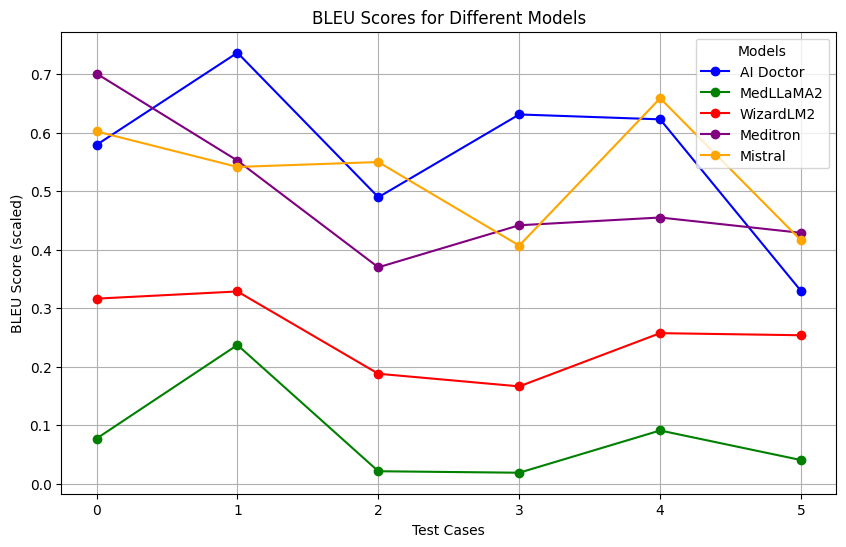

In [52]:
# Transpose the data to get scores for each model
transposed_scores = list(zip(*bleu_scores))

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a line graph
plt.figure(figsize=(10, 6))
for i, model_scores in enumerate(transposed_scores):
    plt.plot(model_scores, marker='o', label=model_names[i], color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('BLEU Score (scaled)')
plt.title('BLEU Scores for Different Models')
plt.legend(title='Models')
plt.grid(True)

# Show the plot
plt.show()

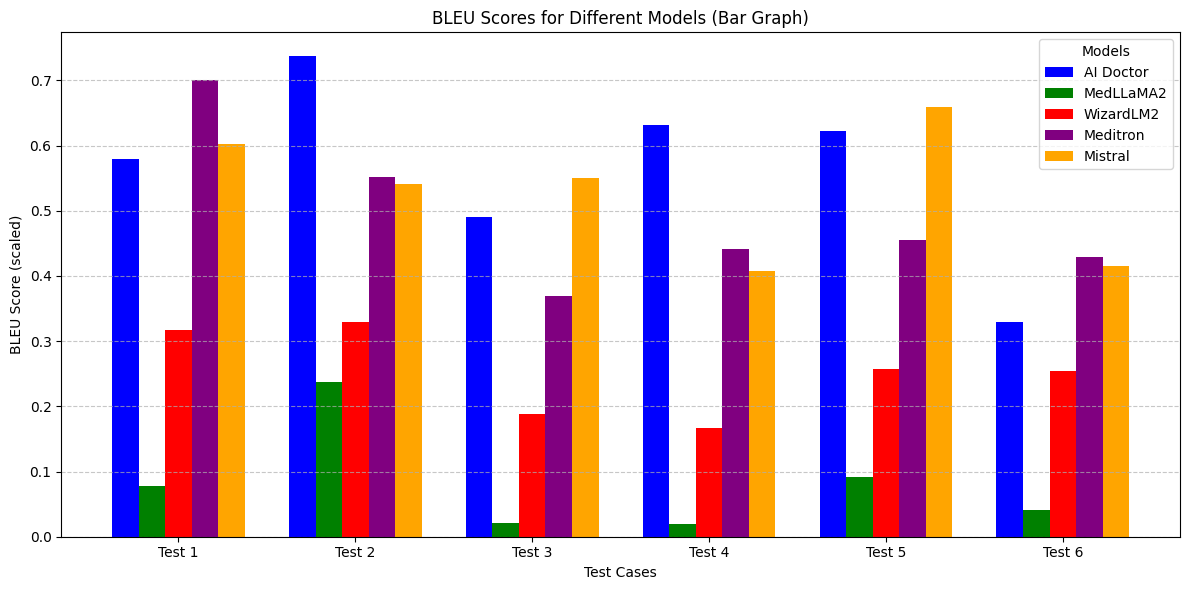

In [53]:
num_tests = len(bleu_scores)

# Group bar settings
x = np.arange(num_tests)  # Test cases
bar_width = 0.15  # Width of each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the bar graph
plt.figure(figsize=(12, 6))
for i, model_name in enumerate(model_names):
    # Extract scores for each model
    scores = [bleu_scores[test][i] for test in range(num_tests)]
    plt.bar(x + i * bar_width, scores, bar_width, label=model_name, color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('BLEU Score (scaled)')
plt.title('BLEU Scores for Different Models (Bar Graph)')
plt.xticks(x + bar_width * 2, [f'Test {i+1}' for i in range(num_tests)])  # Center ticks under groups
plt.legend(title='Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


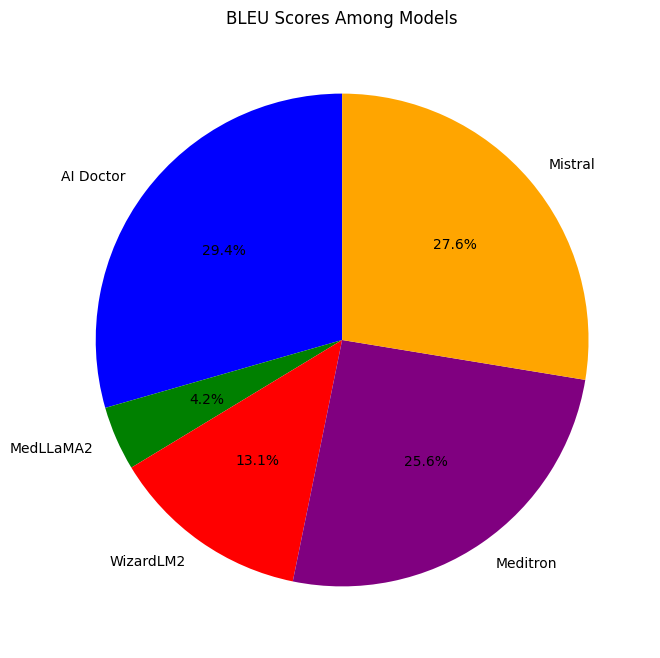

In [54]:
# BLEU scores for each model (example data, update it with your actual values)
average_bleu_scores = [(aidoctor_bleu+aidoctor_bleu1+aidoctor_bleu2+aidoctor_bleu3+aidoctor_bleu4+aidoctor_bleu5)/6,
                       (medllama2_bleu+medllama2_bleu1+medllama2_bleu2+medllama2_bleu3+medllama2_bleu4+medllama2_bleu5)/6, 
                       (wizardlm2_bleu+wizardlm2_bleu1+wizardlm2_bleu2+wizardlm2_bleu3+wizardlm2_bleu4+wizardlm2_bleu5)/6, 
                       (meditron_bleu+meditron_bleu1+meditron_bleu2+meditron_bleu3+meditron_bleu4+meditron_bleu5)/6, 
                       (mistral_bleu+mistral_bleu1+mistral_bleu2+mistral_bleu3+mistral_bleu4+mistral_bleu5)/6]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_bleu_scores, labels=model_names, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('BLEU Scores Among Models')
plt.show()


In [55]:
wizardlm2_len = len(wizardlm2_output)
meditron_len = len(meditron_output)
medllama2_len = len(medllama2_output)
aidoctor_len = len(aidoctor_output)
mistral_len = len(mistral_output)

In [56]:
wizardlm2_len1 = len(wizardlm2_output1)
meditron_len1 = len(meditron_output1)
medllama2_len1 = len(medllama2_output1)
aidoctor_len1 = len(aidoctor_output1)
mistral_len1 = len(mistral_output1)

In [57]:
wizardlm2_len2 = len(wizardlm2_output2)
meditron_len2 = len(meditron_output2)
medllama2_len2 = len(medllama2_output2)
aidoctor_len2 = len(aidoctor_output2)
mistral_len2 = len(mistral_output2)

In [58]:
wizardlm2_len3 = len(wizardlm2_output3)
meditron_len3 = len(meditron_output3)
medllama2_len3 = len(medllama2_output3)
aidoctor_len3 = len(aidoctor_output3)
mistral_len3 = len(mistral_output3)

In [59]:
wizardlm2_len4 = len(wizardlm2_output4)
meditron_len4 = len(meditron_output4)
medllama2_len4 = len(medllama2_output4)
aidoctor_len4 = len(aidoctor_output4)
mistral_len4 = len(mistral_output4)

In [60]:
wizardlm2_len5 = len(wizardlm2_output5)
meditron_len5 = len(meditron_output5)
medllama2_len5 = len(medllama2_output5)
aidoctor_len5 = len(aidoctor_output5)
mistral_len5 = len(mistral_output5)

In [61]:
model_names = ['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral']
output_length = [aidoctor_len, medllama2_len, wizardlm2_len, meditron_len, mistral_len]
output_length1 = [aidoctor_len1, medllama2_len1, wizardlm2_len1, meditron_len1, mistral_len1]
output_length2 = [aidoctor_len2, medllama2_len2, wizardlm2_len2, meditron_len2, mistral_len2]
output_length3 = [aidoctor_len3, medllama2_len3, wizardlm2_len3, meditron_len3, mistral_len3]
output_length4 = [aidoctor_len4, medllama2_len4, wizardlm2_len4, meditron_len, mistral_len4]
output_length5 = [aidoctor_len5, medllama2_len5, wizardlm2_len5, meditron_len5, mistral_len5]
output_lengths = [output_length, output_length1, output_length2, output_length3, output_length4, output_length5]

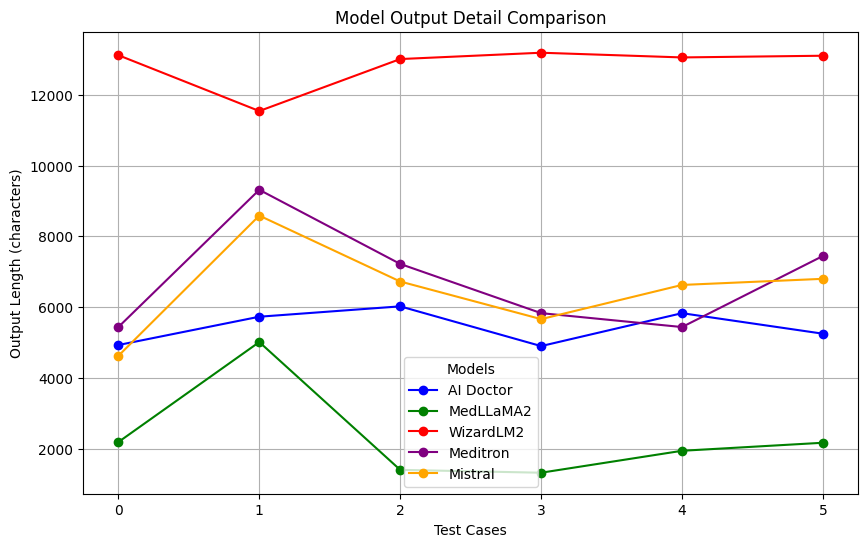

In [62]:
# Transpose the data to get scores for each model
transposed_scores = list(zip(*output_lengths))

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a line graph
plt.figure(figsize=(10, 6))
for i, model_scores in enumerate(transposed_scores):
    plt.plot(model_scores, marker='o', label=model_names[i], color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('Output Length (characters)')
plt.title('Model Output Detail Comparison')
plt.legend(title='Models')
plt.grid(True)

# Show the plot
plt.show()

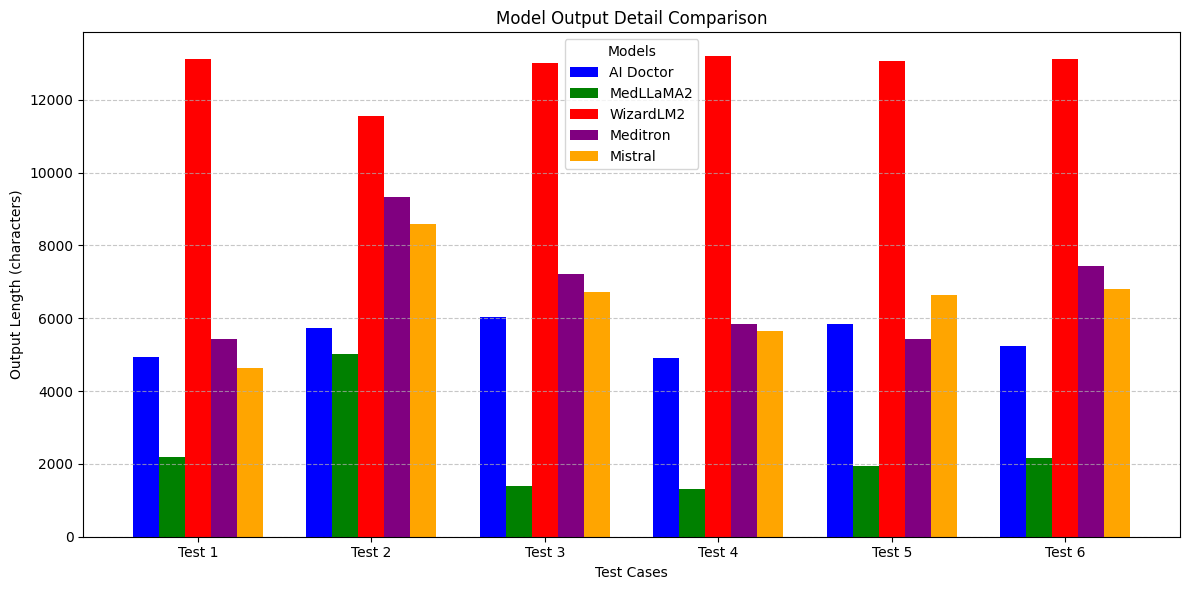

In [63]:
num_tests = len(output_lengths)

# Group bar settings
x = np.arange(num_tests)  # Test cases
bar_width = 0.15  # Width of each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the bar graph
plt.figure(figsize=(12, 6))
for i, model_name in enumerate(model_names):
    # Extract scores for each model
    scores = [output_lengths[test][i] for test in range(num_tests)]
    plt.bar(x + i * bar_width, scores, bar_width, label=model_name, color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('Output Length (characters)')
plt.title('Model Output Detail Comparison')
plt.xticks(x + bar_width * 2, [f'Test {i+1}' for i in range(num_tests)])  # Center ticks under groups
plt.legend(title='Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


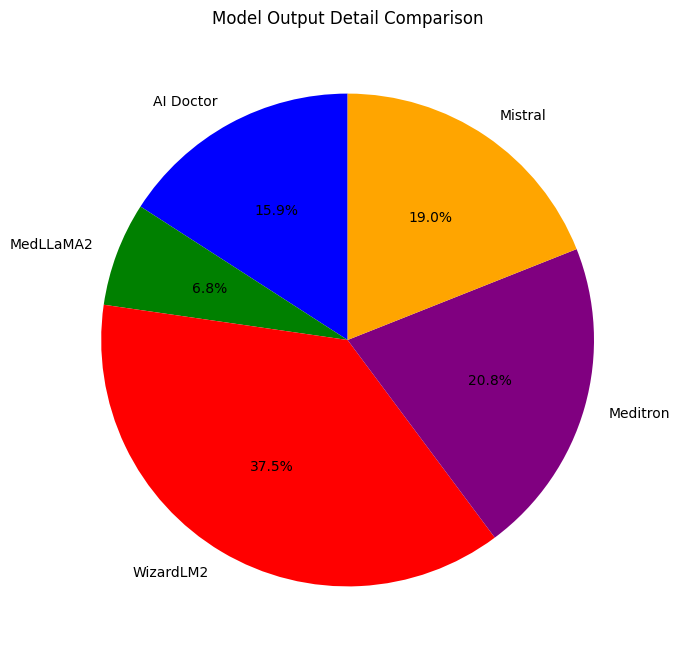

In [64]:
# BLEU scores for each model (example data, update it with your actual values)
average_bleu_scores = [(aidoctor_len+aidoctor_len1+aidoctor_len2+aidoctor_len3+aidoctor_len4+aidoctor_len5)/6,
                       (medllama2_len+medllama2_len1+medllama2_len2+medllama2_len3+medllama2_len4+medllama2_len5)/6, 
                       (wizardlm2_len+wizardlm2_len1+wizardlm2_len2+wizardlm2_len3+wizardlm2_len4+wizardlm2_len5)/6, 
                       (meditron_len+meditron_len1+meditron_len2+meditron_len3+meditron_len4+meditron_len5)/6, 
                       (mistral_len+mistral_len1+mistral_len2+mistral_len3+mistral_len4+mistral_len5)/6]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_bleu_scores, labels=model_names, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Output Detail Comparison')
plt.show()


In [65]:
# Measure computation time for each model
aidoctor_time = aidoctor_output_list[0]
medllama2_time = medllama2_output_list[0]
wizardlm2_time = wizardlm2_output_list[0]
meditron_time = meditron_output_list[0]
mistral_time = mistral_output_list[0]

In [66]:
aidoctor_time1 = aidoctor_output_list1[0]
medllama2_time1 = medllama2_output_list1[0]
wizardlm2_time1 = wizardlm2_output_list1[0]
meditron_time1 = meditron_output_list1[0]
mistral_time1 = mistral_output_list1[0]

In [67]:
aidoctor_time2 = aidoctor_output_list2[0]
medllama2_time2 = medllama2_output_list2[0]
wizardlm2_time2 = wizardlm2_output_list2[0]
meditron_time2 = meditron_output_list2[0]
mistral_time2 = mistral_output_list2[0]

In [68]:
aidoctor_time3 = aidoctor_output_list3[0]
medllama2_time3 = medllama2_output_list3[0]
wizardlm2_time3 = wizardlm2_output_list3[0]
meditron_time3 = meditron_output_list3[0]
mistral_time3 = mistral_output_list3[0]

In [69]:
aidoctor_time4 = aidoctor_output_list4[0]
medllama2_time4 = medllama2_output_list4[0]
wizardlm2_time4 = wizardlm2_output_list4[0]
meditron_time4 = meditron_output_list4[0]
mistral_time4 = mistral_output_list4[0]

In [70]:
aidoctor_time5 = aidoctor_output_list5[0]
medllama2_time5 = medllama2_output_list5[0]
wizardlm2_time5 = wizardlm2_output_list5[0]
meditron_time5 = meditron_output_list5[0]
mistral_time5 = mistral_output_list5[0]

In [71]:
model_names = ['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral']
op_speed = [aidoctor_time, medllama2_time, wizardlm2_time, meditron_time, mistral_time]
op_speed1 = [aidoctor_time1, medllama2_time1, wizardlm2_time1, meditron_time1, mistral_time1]
op_speed2 = [aidoctor_time2, medllama2_time2, wizardlm2_time2, meditron_time2, mistral_time2]
op_speed3 = [aidoctor_time3, medllama2_time3, wizardlm2_time3, meditron_time3, mistral_time3]
op_speed4 = [aidoctor_time4, medllama2_time4, wizardlm2_time4, meditron_time4, mistral_time4]
op_speed5 = [aidoctor_time5, medllama2_time5, wizardlm2_time5, meditron_time5, mistral_time5]
op_speeds = [op_speed, op_speed1, op_speed2, op_speed3, op_speed4, op_speed5]

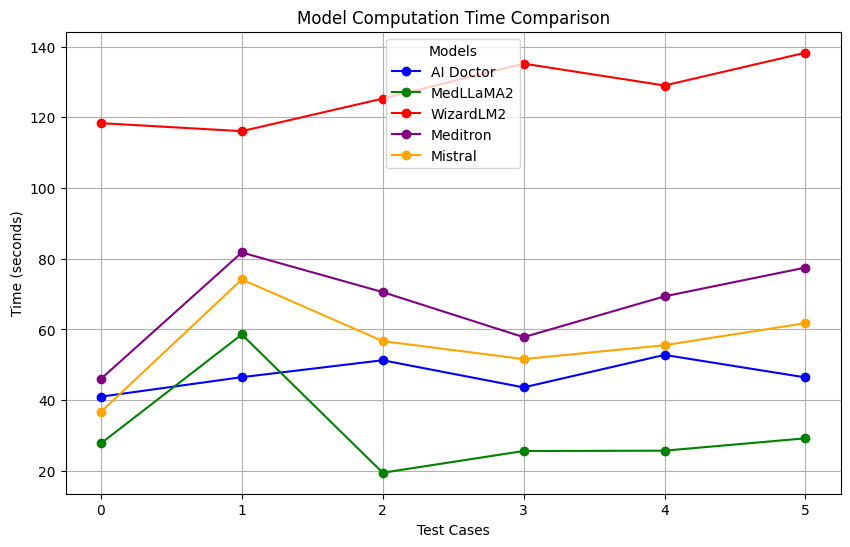

In [72]:
# Transpose the data to get scores for each model
transposed_scores = list(zip(*op_speeds))

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a line graph
plt.figure(figsize=(10, 6))
for i, model_scores in enumerate(transposed_scores):
    plt.plot(model_scores, marker='o', label=model_names[i], color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('Time (seconds)')
plt.title('Model Computation Time Comparison')
plt.legend(title='Models')
plt.grid(True)

# Show the plot
plt.show()

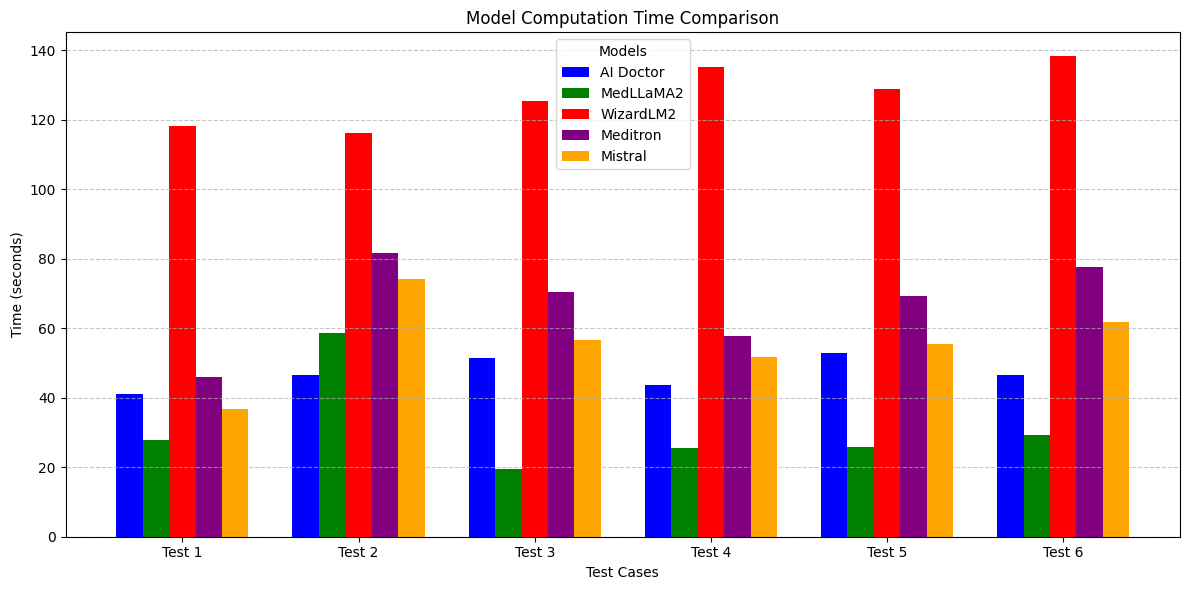

In [73]:
num_tests = len(op_speeds)

# Group bar settings
x = np.arange(num_tests)  # Test cases
bar_width = 0.15  # Width of each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the bar graph
plt.figure(figsize=(12, 6))
for i, model_name in enumerate(model_names):
    # Extract scores for each model
    scores = [op_speeds[test][i] for test in range(num_tests)]
    plt.bar(x + i * bar_width, scores, bar_width, label=model_name, color=colors[i])

# Add labels, title, and legend
plt.xlabel('Test Cases')
plt.ylabel('Time (seconds)')
plt.title('Model Computation Time Comparison')
plt.xticks(x + bar_width * 2, [f'Test {i+1}' for i in range(num_tests)])  # Center ticks under groups
plt.legend(title='Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


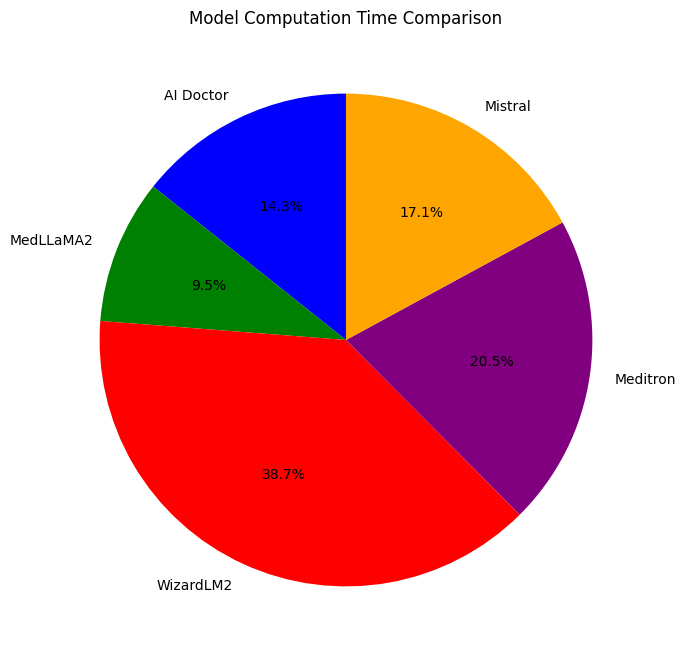

In [74]:
# BLEU scores for each model (example data, update it with your actual values)
average_bleu_scores = [(aidoctor_time+aidoctor_time1+aidoctor_time2+aidoctor_time3+aidoctor_time4+aidoctor_time5)/6,
                       (medllama2_time+medllama2_time1+medllama2_time2+medllama2_time3+medllama2_time4+medllama2_time5)/6, 
                       (wizardlm2_time+wizardlm2_time1+wizardlm2_time2+wizardlm2_time3+wizardlm2_time4+wizardlm2_time5)/6, 
                       (meditron_time+meditron_time1+meditron_time2+meditron_time3+meditron_time4+meditron_time5)/6, 
                       (mistral_time+mistral_time1+mistral_time2+mistral_time3+mistral_time4+mistral_time5)/6]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_bleu_scores, labels=model_names, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Computation Time Comparison')
plt.show()


In [75]:
# # ollama create aidoctor -f ./modelfile.py
# !pip install ipywidgets
# !pip install ollama
# !pip install gradio
# !pip install langchain
# import ollama
# import gradio as gr
# import re
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# import matplotlib.pyplot as plt
# import time
# def process_text(input_data):
#     if input_data is None:
#         return None, None

#     text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
#     chunks = text_splitter.split_text(input_data)
#     return text_splitter, chunks

# def ollama_llm(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model="aidoctor", messages=[{'role': 'user', 'content': formatted_prompt}])
#     response_content = response['message']['content']
#     final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
#     return final_answer

# def ollama_llm_medllama2(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model="medllama2", messages=[{'role': 'user', 'content': formatted_prompt}])
#     response_content = response['message']['content']
#     final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
#     return final_answer

# def ollama_llm_wizardlm2(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model="wizardlm2", messages=[{'role': 'user', 'content': formatted_prompt}])
#     response_content = response['message']['content']
#     final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
#     return final_answer

# def ollama_llm_mistral(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model="mistral", messages=[{'role': 'user', 'content': formatted_prompt}])
#     response_content = response['message']['content']
#     final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
#     return final_answer

# def ollama_llm_meditron(question, context):
#     formatted_prompt = f"Question: {question}\n\nContext: {context}"
#     response = ollama.chat(model="mistral", messages=[{'role': 'user', 'content': formatted_prompt}])
#     response_content = response['message']['content']
#     final_answer = re.sub(r'<think>.*?</think>', '', response_content, flags=re.DOTALL).strip()
#     return final_answer

# def rag_chain(question, chunks):
#     formatted_content = "\n\n".join(chunks)
#     return ollama_llm(question, formatted_content)

# def rag_chain_medllama2(question, chunks):
#     formatted_content = "\n\n".join(chunks)
#     return ollama_llm_medllama2(question, formatted_content)

# def rag_chain_wizardlm2(question, chunks):
#     formatted_content = "\n\n".join(chunks)
#     return ollama_llm_wizardlm2(question, formatted_content)

# def rag_chain_mistral(question, chunks):
#     formatted_content = "\n\n".join(chunks)
#     return ollama_llm_mistral(question, formatted_content)

# def rag_chain_meditron(question, chunks):
#     formatted_content = "\n\n".join(chunks)
#     return ollama_llm_mistral(question, formatted_content)

# def detailed_diagnosis(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain("Please provide a detailed diagnosis for the symptoms described.", chunks)
#     cures = rag_chain("What are the possible cures for the diagnosed condition?", chunks)
#     treatments = rag_chain("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"Diagnosis:\n\n{diagnosis}\n\n"
#         f"Cures:\n\n{cures}\n\n"
#         f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

# def detailed_diagnosis_medllama2(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain_medllama2("Please provide a detailed diagnosis for the symptoms described.", chunks)
#     cures = rag_chain_medllama2("What are the possible cures for the diagnosed condition?", chunks)
#     treatments = rag_chain_medllama2("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"Diagnosis:\n\n{diagnosis}\n\n"
#         f"Cures:\n\n{cures}\n\n"
#         f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

# def detailed_diagnosis_wizardlm2(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain_wizardlm2("Please provide a detailed diagnosis for the symptoms described.", chunks)
#     cures = rag_chain_wizardlm2("What are the possible cures for the diagnosed condition?", chunks)
#     treatments = rag_chain_wizardlm2("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"Diagnosis:\n\n{diagnosis}\n\n"
#         f"Cures:\n\n{cures}\n\n"
#         f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

# def detailed_diagnosis_mistral(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain_mistral("Please provide a detailed diagnosis for the symptoms described.", chunks)
#     cures = rag_chain_mistral("What are the possible cures for the diagnosed condition?", chunks)
#     treatments = rag_chain_mistral("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"Diagnosis:\n\n{diagnosis}\n\n"
#         f"Cures:\n\n{cures}\n\n"
#         f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

# def detailed_diagnosis_meditron(input_text):
#     text_splitter, chunks = process_text(input_text)
#     if text_splitter is None:
#         return "No text input provided."

#     diagnosis = rag_chain_meditron("Please provide a detailed diagnosis for the symptoms described.", chunks)
#     cures = rag_chain_meditron("What are the possible cures for the diagnosed condition?", chunks)
#     treatments = rag_chain_meditron("What are the possible treatments for the diagnosed condition?", chunks)
    
#     structured_response = (
#         f"Diagnosis:\n\n{diagnosis}\n\n"
#         f"Cures:\n\n{cures}\n\n"
#         f"Treatments:\n\n{treatments}\n\n"
#     )

#     return structured_response

# interface = gr.Interface(
#     fn=detailed_diagnosis,
#     inputs=gr.Textbox(lines=10, label="Describe your symptoms"),
#     outputs="text",
#     title="AI Doctor - Detailed Diagnosis",
#     description="Enter your symptoms to receive a detailed medical diagnosis and recommendations."
# )

# interface.launch()

# def compare_accuracy(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output, ground_truth):

#     # Smoothing Function
#     smoothing = SmoothingFunction().method1

#     # Evaluate accuracy using BLEU score with smoothing
#     aidoctor_bleu = sentence_bleu([ground_truth.split()], aidoctor_output.split(), smoothing_function=smoothing)
#     medllama2_bleu = sentence_bleu([ground_truth.split()], medllama2_output.split(), smoothing_function=smoothing)
#     wizardlm2_bleu = sentence_bleu([ground_truth.split()], wizardlm2_output.split(), smoothing_function=smoothing)
#     meditron_bleu = sentence_bleu([ground_truth.split()], meditron_output.split(), smoothing_function=smoothing)
#     mistral_bleu = sentence_bleu([ground_truth.split()], mistral_output.split(), smoothing_function=smoothing)

#     # Display the scores
#     print(f"AI Doctor BLEU Score: {aidoctor_bleu}")
#     print(f"MedLLaMA2 BLEU Score: {medllama2_bleu}")
#     print(f"WizardLM2 BLEU Score: {wizardlm2_bleu}")
#     print(f"Meditron BLEU Score: {meditron_bleu}")
#     print(f"Mistral BLEU Score: {mistral_bleu}")

#     # Prepare data for plotting
#     model_names = ['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral']
#     bleu_scores = [aidoctor_bleu, medllama2_bleu, wizardlm2_bleu, meditron_bleu, mistral_bleu]

#     # Plot the BLEU scores
#     plt.figure(figsize=(10, 5))
#     plt.bar(model_names, bleu_scores, color=['blue', 'red', 'yellow', 'green', 'orange'])
#     plt.xlabel('Models')
#     plt.ylabel('BLEU Score')
#     plt.title('Accuracy Comparison (BLEU Scores)')
#     plt.ylim(0, 0.2)  # BLEU scores range from 0 to 1
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# def compare_models(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output):
#     # Compare outputs from all four models
#     if (
#         aidoctor_output == medllama2_output == wizardlm2_output == meditron_output == mistral_output
#     ):
#         return "The outputs of all four models are identical."
#     else:
#         differences = []
#         if aidoctor_output != medllama2_output:
#             differences.append("AI Doctor vs. MedLLaMA2 outputs differ.")
#         if aidoctor_output != wizardlm2_output:
#             differences.append("AI Doctor vs. WizardLM2 outputs differ.")
#         if aidoctor_output != meditron_output:
#             differences.append("AI Doctor vs. Meditron outputs differ.")
#         if aidoctor_output != mistral_output:
#             differences.append("AI Doctor vs. Mistral outputs differ.")
#         if medllama2_output != wizardlm2_output:
#             differences.append("MedLLaMA2 vs. WizardLM2 outputs differ.")
#         if medllama2_output != meditron_output:
#             differences.append("MedLLaMA2 vs. Meditron outputs differ.")
#         if medllama2_output != mistral_output:
#             differences.append("MedLLaMA2 vs. Mistral outputs differ.")
#         if wizardlm2_output != meditron_output:
#             differences.append("WizardLM2 vs. Meditron outputs differ.")
#         if wizardlm2_output != mistral_output:
#             differences.append("WizardLM2 vs. Mistral outputs differ.")
#         if meditron_output != mistral_output:
#             differences.append("Meditron vs. Mistral outputs differ.")
#         return "The outputs of the models differ:\n" + "\n".join(differences)

# # Function to measure computation time for each model
# def measure_computation_speed(func, input_text):
#     start_time = time.time()
#     output = func(input_text)  # Run the function
#     end_time = time.time()
#     return [end_time - start_time, output]

# # Example usage with the outputs of two models
# input_text = "I have been experiencing the following symptoms: Persistent headache, Nausea and vomiting, Sensitivity to light, Stiff neck, Fever. Please provide a detailed diagnosis, possible cures, and treatments."

# aidoctor_output_list = measure_computation_speed(detailed_diagnosis,input_text)
# medllama2_output_list = measure_computation_speed(detailed_diagnosis_medllama2,input_text)
# wizardlm2_output_list = measure_computation_speed(detailed_diagnosis_wizardlm2,input_text)
# meditron_output_list = measure_computation_speed(detailed_diagnosis_meditron,input_text)
# mistral_output_list = measure_computation_speed(detailed_diagnosis_mistral,input_text)

# aidoctor_output = aidoctor_output_list[1]
# medllama2_output = medllama2_output_list[1]
# wizardlm2_output = wizardlm2_output_list[1] 
# meditron_output = meditron_output_list[1]
# mistral_output = mistral_output_list[1]

# comparison_result = compare_models(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output)
# print("Model Result Comparision Report:\n",comparison_result)

# # Ground Truth Data
# ground_truth = """
# Diagnosis:
# Based on your symptoms of persistent headache, nausea and vomiting, sensitivity to light, stiff neck, and fever, I would suggest the possibility of Meningeal Inflammation or Meningitis.
# Meningitis is an inflammation of the meninges, the membranes that cover the brain and spinal cord. It can be caused by viruses, bacteria, fungi, or other diseases. Symptoms may include severe headache, stiff neck, fever, nausea and vomiting, and sensitivity to light.
# To confirm the diagnosis, a lumbar puncture (spinal tap) will be required to analyze the cerebrospinal fluid for signs of infection. A CT scan or MRI may also be ordered to visualize the brain and spinal cord.
# If meningitis is confirmed, the treatment would typically involve antibiotics if it's a bacterial infection, antiviral medication in case of viral meningitis, and supportive care such as pain management, hydration, and close monitoring of vital signs. In severe cases, hospitalization may be necessary for intensive care and management of complications.
# It is important to note that this diagnosis is based on the symptoms you have described, and a definitive diagnosis can only be made through medical tests and examinations by a healthcare professional. Always consult with a doctor if you are experiencing these or any other concerning symptoms.

# Cures:
# Based on the symptoms you've described - persistent headache, nausea and vomiting, sensitivity to light, stiff neck, and fever - it is possible that you are suffering from Meningitis.
# Meningitis is an inflammation of the meninges, the protective layers covering the brain and spinal cord. It can be caused by infection with viruses, bacteria, or fungi.
# 1. Diagnosis: The diagnosis is typically confirmed through a series of tests including lumbar puncture (spinal tap), CT scan, or MRI. These tests help identify inflammation in the meninges and determine the cause.
# 2. Possible Cures: For bacterial meningitis, antibiotics are usually administered intravenously to kill the bacteria causing the infection. Antiviral drugs may also be used if a viral cause is suspected. In severe cases, hospitalization in an intensive care unit (ICU) may be necessary for close monitoring and supportive treatment.
# 3. Treatment: Treatment primarily involves eliminating the underlying cause and managing symptoms. In addition to antibiotics or antivirals, pain relievers may be prescribed to alleviate headaches. Anti-nausea medications can help with vomiting. Adequate hydration is crucial to prevent dehydration due to vomiting and high fever. For severe cases of meningitis, corticosteroids might be given to reduce inflammation and prevent complications such as hearing loss or cognitive problems.
# Remember, self-diagnosis can be dangerous and this response should not replace a consultation with a qualified healthcare professional. If you suspect that you have meningitis or any other serious medical condition, please seek immediate medical attention.

# Treatments:
# Based on the symptoms you've described (persistent headache, nausea and vomiting, sensitivity to light, stiff neck, fever), it is possible that you might be suffering from Meningitis or Encephalitis, which are inflammatory conditions affecting the meninges (the protective membranes covering the brain and spinal cord) or the brain itself.
# 1. Diagnosis: Diagnostic tests such as blood tests, lumbar puncture (spinal tap), CT scan or MRI may be required to confirm the diagnosis. Symptoms like stiff neck, fever, headache, photophobia (sensitivity to light) are often indicative of Meningitis or Encephalitis.
# 2. Possible Cures: There is no known cure for Meningitis or Encephalitis themselves, but appropriate treatment can help manage the condition and reduce complications.
# 3. Treatments:
#    - Antibiotics: If caused by a bacterial infection, antibiotics will be administered intravenously in a hospital setting. Common choices are ceftriaxone, penicillin G, or vancomycin.
#    - Antivirals: In case of viral meningitis, antiviral medications such as acyclovir may be prescribed.
#    - Pain Relievers and Anti-inflammatory Drugs: Over-the-counter pain relievers like ibuprofen or acetaminophen can help manage symptoms like headache and fever. However, these should be used with caution and under a doctor's supervision.
#    - Hydration and Nutrition: To counteract nausea and vomiting, oral rehydration solutions may be recommended, or intravenous fluids may be given in severe cases. A well-balanced diet is essential for recovery.
#    - Steroids: In some cases of bacterial meningitis, corticosteroids like dexamethasone may be prescribed to reduce inflammation and swelling in the brain.
#    - Supportive Care: Hospitalization is usually required due to the severity of symptoms. Supportive care, such as ensuring proper nutrition, adequate rest, and monitoring vital signs, will be provided throughout treatment.
# """

# compare_accuracy(aidoctor_output, medllama2_output, wizardlm2_output, meditron_output, mistral_output, ground_truth)

# wizardlm2_len = len(wizardlm2_output)
# meditron_len = len(meditron_output)
# medllama2_len = len(medllama2_output)
# aidoctor_len = len(aidoctor_output)
# mistral_len = len(mistral_output)

# # Display output lengths
# print(f"AI Doctor output length: {aidoctor_len} characters")
# print(f"Medllama2 output length: {medllama2_len} characters")
# print(f"Wizardlm2 output length: {wizardlm2_len} characters")
# print(f"Meditron output length: {meditron_len} characters")
# print(f"Mistral output length: {meditron_len} characters")

# # Bar chart for single-run comparison
# plt.figure(figsize=(10, 5))
# plt.bar(['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral'], [aidoctor_len, medllama2_len, wizardlm2_len, meditron_len, mistral_len], color=['blue', 'red' , 'yellow' , 'green', 'orange'])
# plt.ylabel('Output Length (characters)')
# plt.title('Model Output Detail Comparison')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# # Measure computation time for each model
# aidoctor_time = aidoctor_output_list[0]
# medllama2_time = medllama2_output_list[0]
# wizardlm2_time = wizardlm2_output_list[0]
# meditron_time = meditron_output_list[0]
# mistral_time = mistral_output_list[0]

# # Display computation times
# print(f"AI Doctor computation time: {aidoctor_time} seconds")
# print(f"MedLLaMA2 computation time: {medllama2_time} seconds")
# print(f"WizardLM2 computation time: {wizardlm2_time} seconds")
# print(f"Meditron computation time: {meditron_time} seconds")
# print(f"Mistral computation time: {mistral_time} seconds")

# # Bar chart to visualize computation times
# plt.figure(figsize=(10, 5))
# plt.bar(
#     ['AI Doctor', 'MedLLaMA2', 'WizardLM2', 'Meditron', 'Mistral'],
#     [aidoctor_time, medllama2_time, wizardlm2_time, meditron_time, mistral_time],
#     color=['blue', 'red', 'yellow', 'green','orange']
# )
# plt.ylabel('Time (seconds)')
# plt.title('Model Computation Time Comparison')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
